In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
trainSet = pd.read_csv(r'train.csv')
testSet = pd.read_csv(r'test.csv')

In [4]:
trainSet.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
trainSet.info()
print('---------------------------------------------------------')
testSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
---------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket    

Observations
- Age, Embarked and Cabin have some missing values
- Age's format is float

In [6]:
#drop PassengerId and Ticket since they are less useful for prediction
trainSet = trainSet.drop(["PassengerId","Ticket","Name"],axis=1)
testSet = testSet.drop(["Name","Ticket"],axis=1)

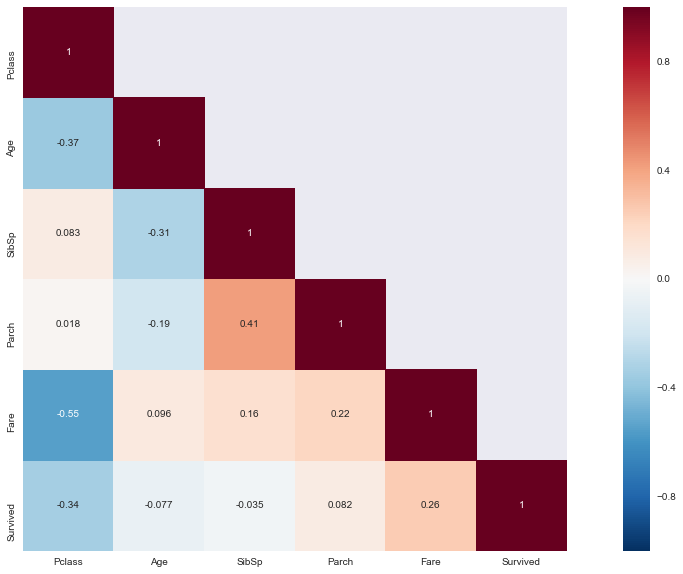

In [7]:
df1 = trainSet.drop(['Survived'],axis=1)
df1['Survived']=trainSet['Survived']
df1 = df1.corr()
mask = np.array(df1)
mask[np.tril_indices_from(mask)]=False
fig = plt.subplots(figsize=(20,10))
sns.heatmap(data=df1,mask=mask,annot=True,square=True)

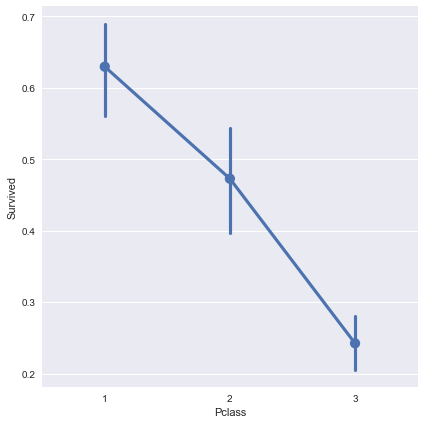

In [8]:
sns.factorplot(x='Pclass',y='Survived',data=trainSet,order=[1,2,3],size=6)

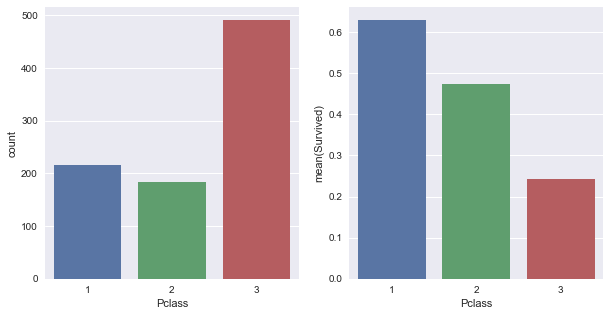

In [9]:
cls_df = trainSet[["Pclass","Survived"]].groupby(["Pclass"],as_index = False).mean()
plt.figure(1,(10,5))
plt.subplot(121)
sns.countplot(x="Pclass",data=trainSet)
plt.subplot(122)
sns.barplot(x="Pclass",y="Survived",data=cls_df)

In [11]:
# one-hot encoding 
dummy_columns = ['Class_1','Class_2','Class_3']
dummy_class_trainSet = pd.get_dummies(trainSet['Pclass'])
dummy_class_trainSet.columns = dummy_columns
dummy_class_testSet = pd.get_dummies(testSet['Pclass'])
dummy_class_testSet.columns = dummy_columns


trainSet = trainSet.drop(['Pclass'],axis=1)
testSet = testSet.drop(['Pclass'],axis=1)

trainSet = trainSet.join(dummy_class_trainSet)
testSet = testSet.join(dummy_class_testSet)

trainSet.info()
print('----------------------------------------------------')
testSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
Class_1     891 non-null uint8
Class_2     891 non-null uint8
Class_3     891 non-null uint8
dtypes: float64(2), int64(3), object(3), uint8(3)
memory usage: 58.4+ KB
----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Class_1        418 non-null uint8
Clas

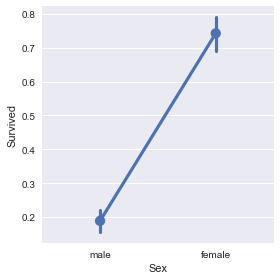

In [12]:
sns.factorplot(x='Sex',y='Survived',data=trainSet,size=4)

In [13]:
trainSet['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

C:\Users\Zishi\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Zishi\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


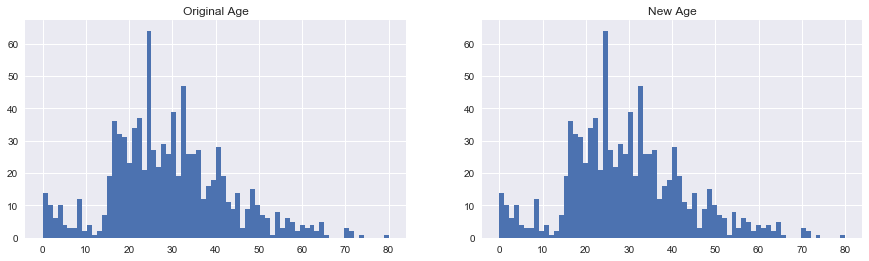

In [19]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.set_title('Original Age')
axis2.set_title('New Age')

age_std_train = trainSet['Age'].std()
age_mean_train = trainSet['Age'].mean()
size = trainSet['Age'].isnull().sum()
trainSet['Age'].dropna().astype(int).hist(bins=70,ax=axis1)

fillvalues_train=np.random.randint(age_mean_train-age_std_train,age_mean_train+age_std_train,size=size)
trainSet['Age'][np.isnan(trainSet['Age'])] = fillvalues_train
trainSet['Age'] = trainSet['Age'].astype(int)
trainSet['Age'].hist(bins=70,ax=axis2)

age_std_test=testSet['Age'].std()
age_mean_test=testSet['Age'].mean()
size=testSet['Age'].isnull().sum()
fillvalues_test=np.random.randint(age_mean_test-age_std_test,age_mean_test+age_std_test,size=size)
testSet['Age'][np.isnan(testSet['Age'])] = fillvalues_test
testSet['Age'] = testSet['Age'].astype(int)

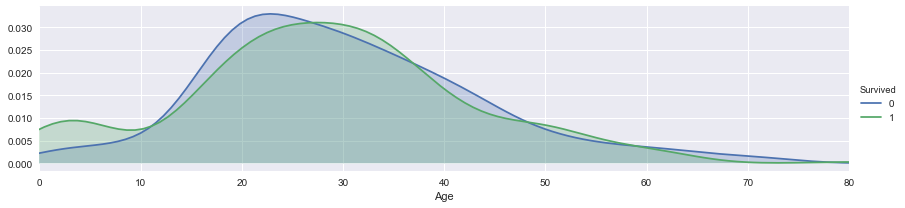

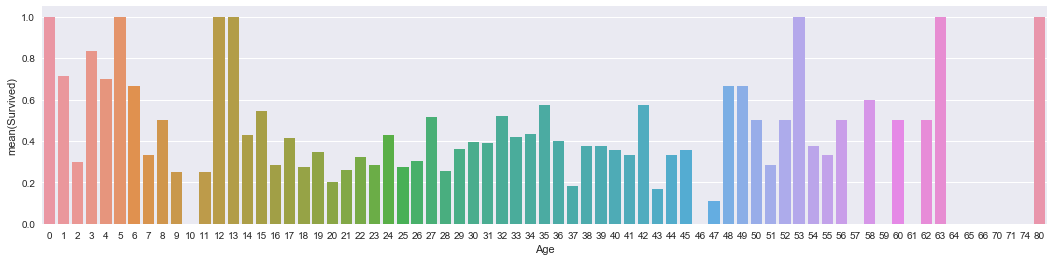

In [24]:
facet = sns.FacetGrid(trainSet,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,trainSet['Age'].max()))
facet.add_legend()

fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = age.groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age',y='Survived',data=average_age)

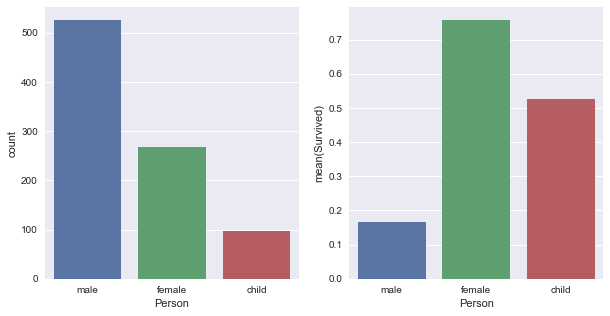

In [27]:
def get_person(person):
    age,sex = person
    return 'child' if age < 16 else sex
trainSet['Person'] = trainSet[['Age','Sex']].apply(get_person,axis=1)
testSet['Person'] = testSet[['Age','Sex']].apply(get_person,axis=1)
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))
sns.countplot(x='Person',data=trainSet,ax=axis1)
person = trainSet[['Person','Survived']].groupby(['Person'],as_index=False).mean()
sns.barplot(x='Person',y='Survived',data=person,ax=axis2,order=['male','female','child'])

In [28]:
#one-hot encoding
dummy_columns = ['Child','Female','Male']
dummy_person_train = pd.get_dummies(trainSet['Person'])
dummy_person_train.columns=dummy_columns
dummy_person_test = pd.get_dummies(testSet['Person'])
dummy_person_test.columns=dummy_columns
trainSet = trainSet.join(dummy_person_train)
testSet = testSet.join(dummy_person_test)

trainSet.drop(['Sex'],axis=1,inplace=True)
testSet.drop(['Sex'],axis=1,inplace=True)

trainSet.info()
print('----------------------------------------------------')
testSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
Survived    891 non-null int64
Age         891 non-null int32
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
Class_1     891 non-null uint8
Class_2     891 non-null uint8
Class_3     891 non-null uint8
Person      891 non-null object
Child       891 non-null uint8
Female      891 non-null uint8
Male        891 non-null uint8
dtypes: float64(1), int32(1), int64(3), object(3), uint8(6)
memory usage: 57.5+ KB
----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
PassengerId    418 non-null int64
Age            418 non-null int32
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Cabin          91 non-null object
Embarked 

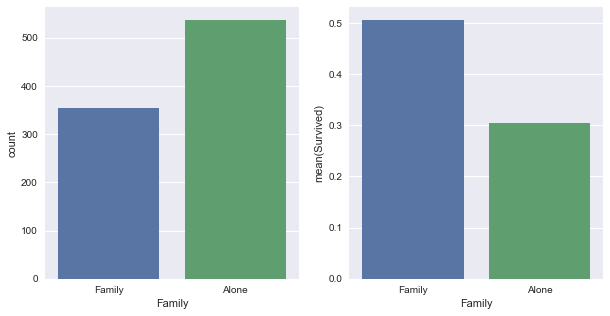

In [36]:
# 'SibSp'and'Parch'

def family(data):
    SibSp,Parch = data
    return 1 if (SibSp >0 or Parch >0) else 0

trainSet['Family'] = trainSet[['SibSp','Parch']].apply(family,axis=1)
testSet['Family'] = testSet[['SibSp','Parch']].apply(family,axis=1)
fig,(axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(10,5))                      
sns.countplot(x='Family',data=trainSet,order=[1,0],ax=axis1)
family = trainSet[['Family','Survived']].groupby(['Family'],as_index=False).mean()
sns.barplot(x='Family',y='Survived',data=family,ax=axis2,order=[1,0])
axis1.set_xticklabels(['Family','Alone'])

trainSet.drop(['SibSp','Parch'],axis=1,inplace=True)
testSet.drop(['SibSp','Parch'],axis=1,inplace=True)

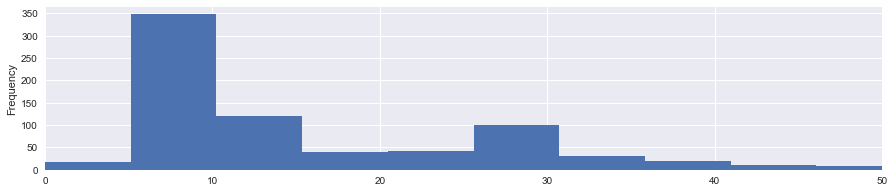

In [40]:
# fare

testSet['Fare'].fillna(testSet['Fare'].median(),inplace=True)

trainSet['Fare'] = trainSet['Fare'].astype(int)
testSet['Fare'] = testSet['Fare'].astype(int)

trainSet['Fare'].plot(kind='hist',figsize=(15,3),bins=100,xlim=(0,50))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Survived    891 non-null int64
Age         891 non-null int32
Fare        891 non-null int32
Cabin       204 non-null object
Embarked    889 non-null object
Class_1     891 non-null uint8
Class_2     891 non-null uint8
Class_3     891 non-null uint8
Person      891 non-null object
Child       891 non-null uint8
Female      891 non-null uint8
Male        891 non-null uint8
Family      891 non-null int64
dtypes: int32(2), int64(2), object(3), uint8(6)
memory usage: 47.1+ KB
----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
PassengerId    418 non-null int64
Age            418 non-null int32
Fare           418 non-null int32
Cabin          91 non-null object
Embarked       418 non-null object
Class_1        418 non-null uint8
Class_2        418 non-null uint8
Class_3        418 no

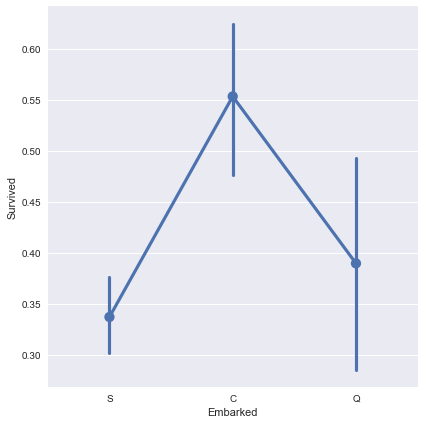

In [42]:
#embarked
sns.factorplot(x='Embarked',y='Survived',data=trainSet,size=6)